*** The Lending Club: Loan default prediction ***

*MLND Capstone Project Notebook*

Serge Bouschet - 28 May 2017

**II. Analysis **

*Data Exploration*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
def maybe_load_loan_data(threshold=1, path='/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/', force='n'):
    def load_data():
        data = pd.read_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/loan.csv', low_memory=False)
        t = len(data) / threshold
        data = data.dropna(thresh=t, axis=1) # Drop any column with more than 50% missing values
        return data

    # conditionally load the data
    try:
        if df.empty or force=='y':
            data = load_data()
        else:
            return df
    except:
        data = load_data()

    return data

df = maybe_load_loan_data(2)

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Number of records 252772
Dataset Shape (252772, 29)
<bound method DataFrame.info of         loan_amnt        term  int_rate  installment grade sub_grade  \
0          5000.0   36 months     10.65       162.87     B        B2   
1          2500.0   60 months     15.27        59.83     C        C4   
2          2400.0   36 months     15.96        84.33     C        C5   
3         10000.0   36 months     13.49       339.31     C        C1   
5          5000.0   36 months      7.90       156.46     A        A4   
7          3000.0   36 months     18.64       109.43     E        E1   
8          5600.0   60 months     21.28       152.39     F        F2   
9          5375.0   60 months     12.69       121.45     B        B5   
10         6500.0   60 months     14.65       153.45     C        C3   
11        12000.0   36 months     12.69       402.54     B        B5   
12         9000.0   36 months     13.49       305.38     C        C1   
13         3000.0   36 months      9.91        96.68

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


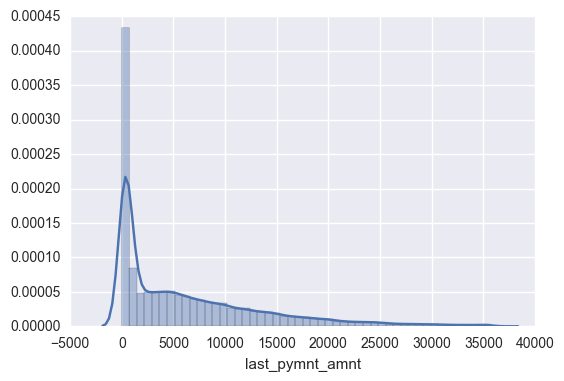

In [126]:
def show_stats(df):
    print ("Number of records {}".format(len(df)))
    print ("Dataset Shape {}".format(df.shape))
    
    print(df.info)

    sns.distplot(df['last_pymnt_amnt'].astype(int))
        
show_stats(df)

In [5]:
# Understand data correlations
numeric_features = df.select_dtypes(include=[np.number])
print("Describing numerical features\n")
print(numeric_features.describe())

categoricals = df.select_dtypes(exclude=[np.number])
print("Describing categorical features\n")
print(categoricals.describe())

corr = numeric_features.corr()

print ("Correlated features with loan amount\n")
print (corr['loan_amnt'].sort_values(ascending=False)[:10], '\n')
print ("Least Correlated features with loan amount\n")
print (corr['loan_amnt'].sort_values(ascending=False)[-10:])

Describing numerical features



/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


                 id     member_id      loan_amnt    funded_amnt  \
count  8.873790e+05  8.873790e+05  887379.000000  887379.000000   
mean   3.246513e+07  3.500182e+07   14755.264605   14741.877625   
std    2.282734e+07  2.411335e+07    8435.455601    8429.897657   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    9.206643e+06  1.087713e+07    8000.000000    8000.000000   
50%    3.443327e+07  3.709528e+07   13000.000000   13000.000000   
75%    5.490814e+07  5.847135e+07   20000.000000   20000.000000   
max    6.861706e+07  7.354484e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    887379.000000  887379.000000  887379.000000  8.873750e+05   
mean      14702.464383      13.246740     436.717127  7.502759e+04   
std        8442.106732       4.381867     244.186593  6.469830e+04   
min           0.000000       5.320000      15.670000  0.000000e+00   
25%        8000.000000       9.990000     260.

In [91]:
def show_dictionary(path='/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/LCDataDictionary.xlsx'):
    data_dictionary = pd.read_excel(path)

    print(data_dictionary.shape[0])
    print(data_dictionary.columns.tolist())

    data_dictionary.rename(columns={'Name': 'name',
                                    'Description': 'description'})
    return data_dictionary

dict = show_dictionary()
dict.set_index('LoanStatNew', inplace=True)
dict.loc[:]

80
['LoanStatNew', 'Description']


,Description
LoanStatNew,
addr_state,The state provided by the borrower in the loan...
annual_inc,The self-reported annual income provided by th...
annual_inc_joint,The combined self-reported annual income provi...
application_type,Indicates whether the loan is an individual ap...
collection_recovery_fee,post charge off collection fee
collections_12_mths_ex_med,Number of collections in 12 months excluding m...
delinq_2yrs,The number of 30+ days past-due incidences of ...
desc,Loan description provided by the borrower
dti,A ratio calculated using the borrower’s total ...


*Exploratory Visualization*

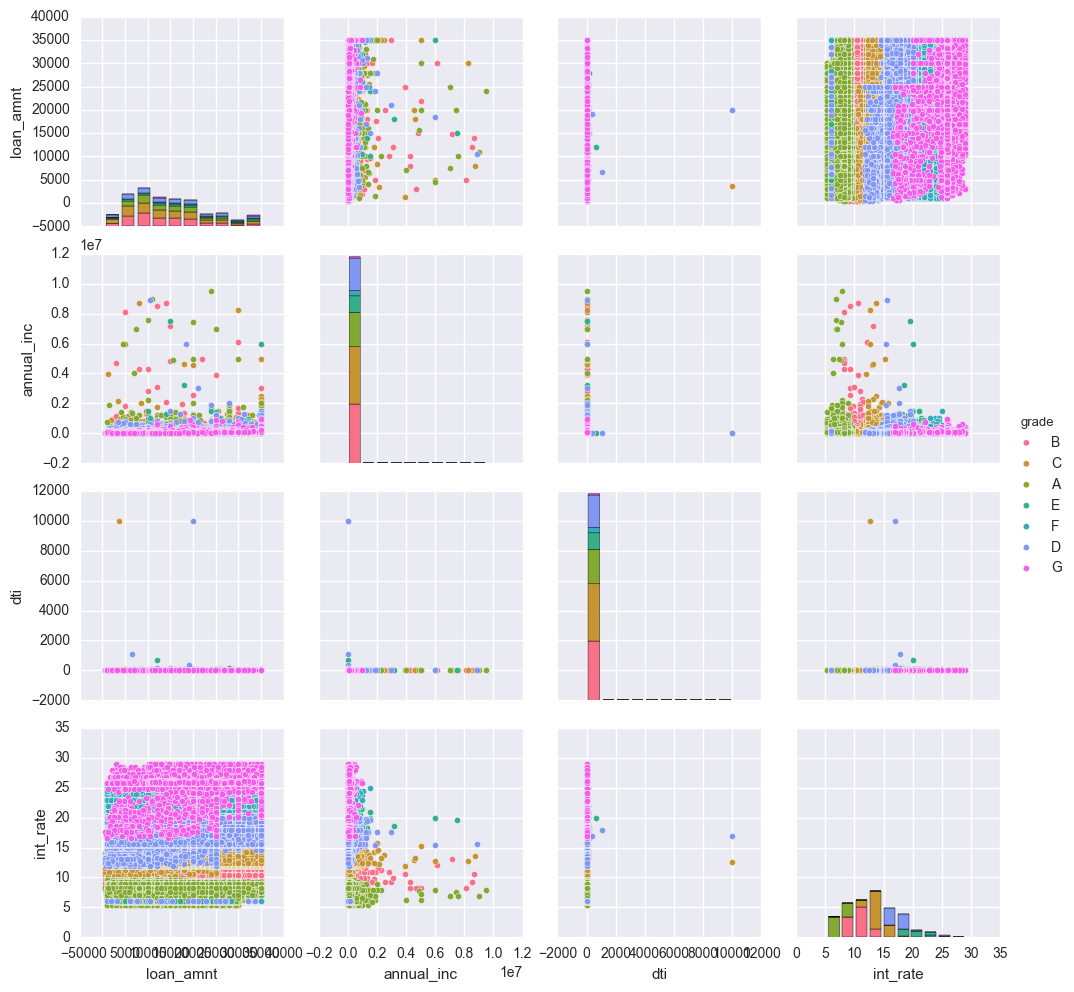

In [42]:
sns.pairplot(df[['loan_amnt', 'annual_inc', 'dti', 'int_rate','grade']].dropna(), hue='grade')
plt.set_xticklabels(rotation=90)

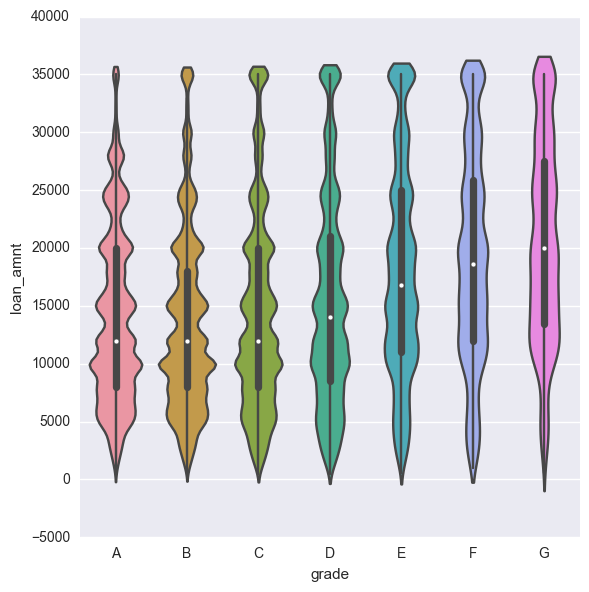

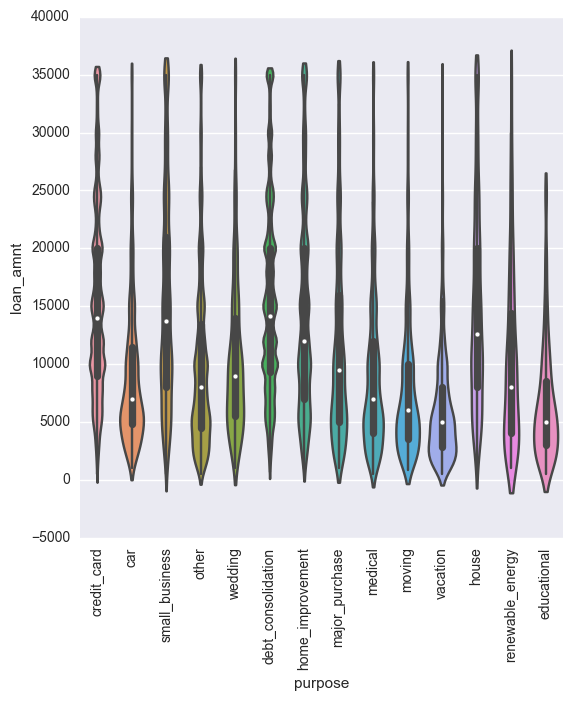

In [44]:
g = sns.factorplot(x="grade", y="loan_amnt", order=["A","B","C","D","E","F","G"], data=df, size=6, \
                    kind="violin", split=True, cut=1, aspect=1)

g2 = sns.factorplot(x="purpose", y="loan_amnt", data=df, size=6, \
                    kind="violin", split=True, cut=1, aspect=1)
g2.set_xticklabels(rotation=90)

In [46]:
df[df.purpose.isin(['debt_consolidation', 'credit_card']) == False].groupby(by=['loan_status','purpose']).count()['id']

loan_status         purpose         
Charged Off         car                   448
                    educational            56
                    home_improvement     2269
                    house                 286
                    major_purchase        874
                    medical               569
                    moving                425
                    other                2936
                    renewable_energy       54
                    small_business       1371
                    vacation              270
                    wedding               265
Current             car                  4937
                    educational             1
                    home_improvement    34980
                    house                1854
                    major_purchase      10308
                    medical              5324
                    moving               3121
                    other               26607
                    renewable_energy      2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bbbd8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b679ac8>]], dtype=object)

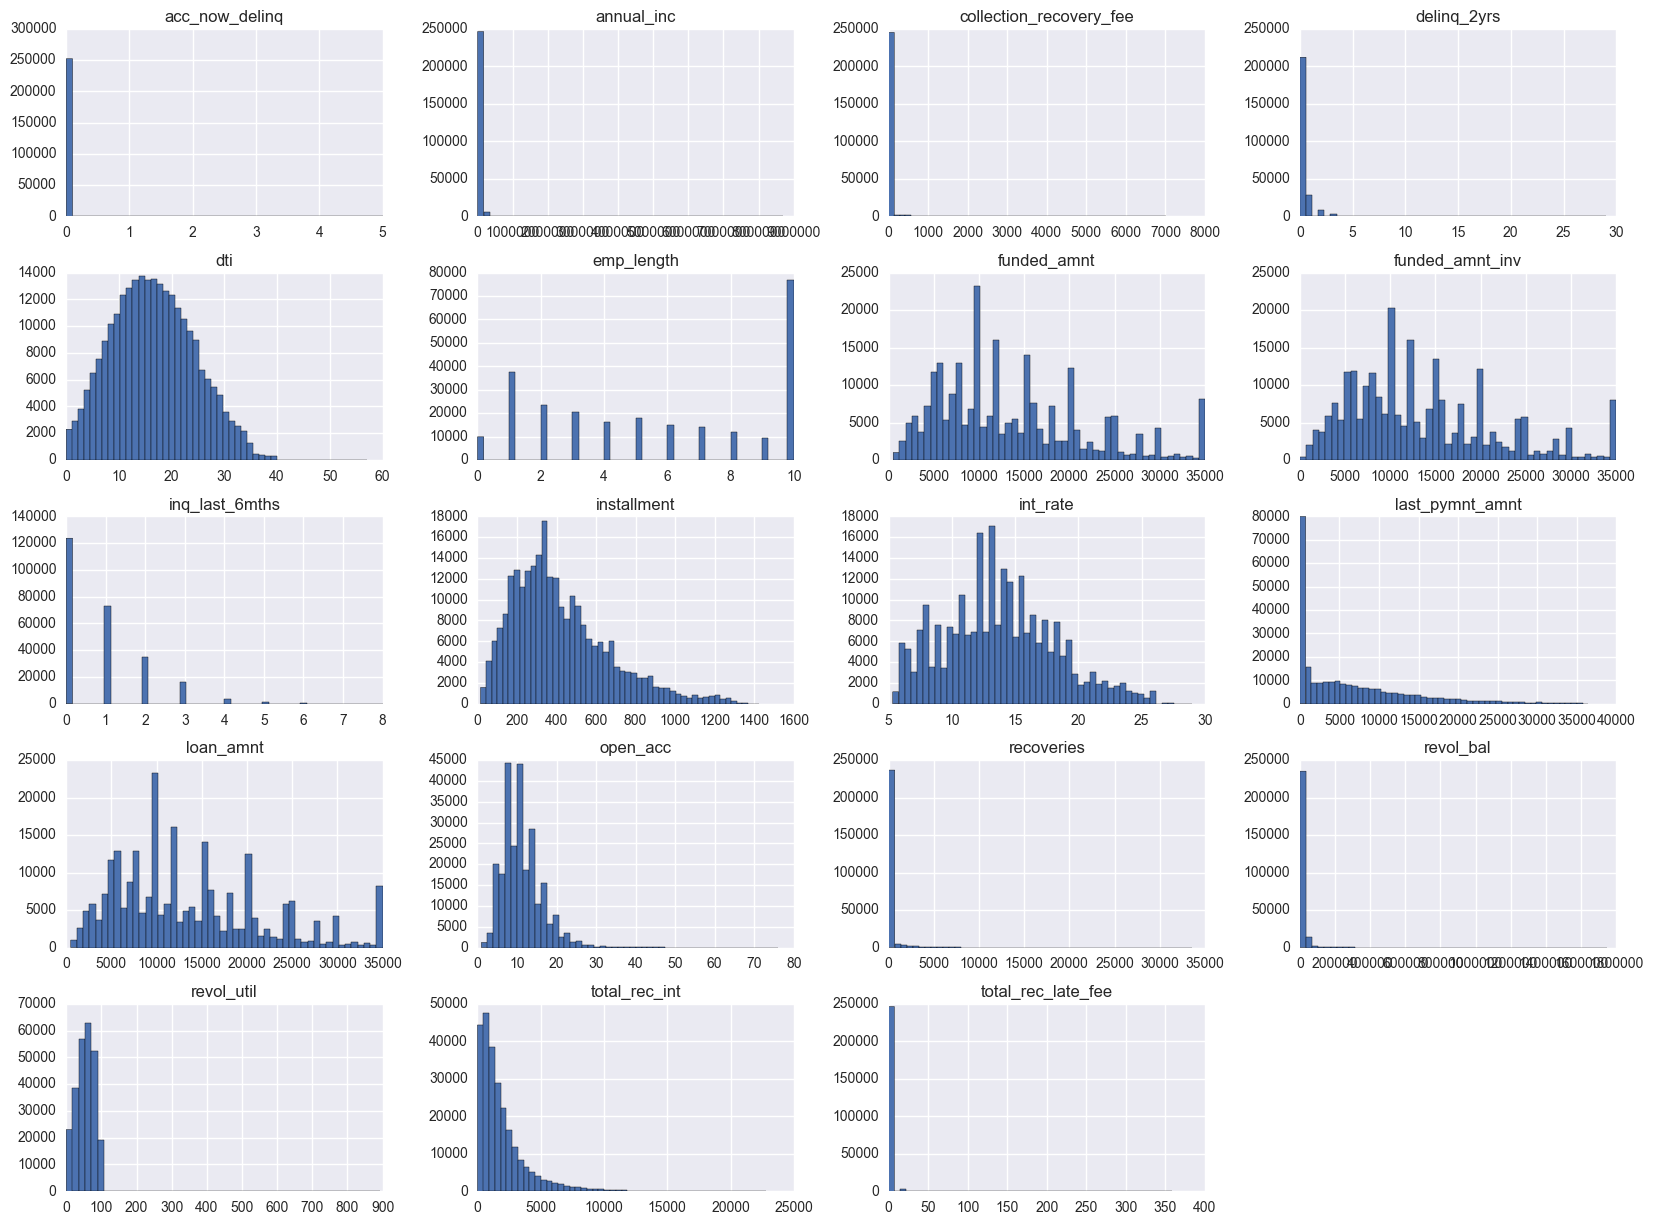

In [112]:
#df.hist(bins=50, figsize=(20,15))
df.select_dtypes(include=[np.number]).hist(bins=50, figsize=(20,15))

TypeError: unorderable types: str() < int()

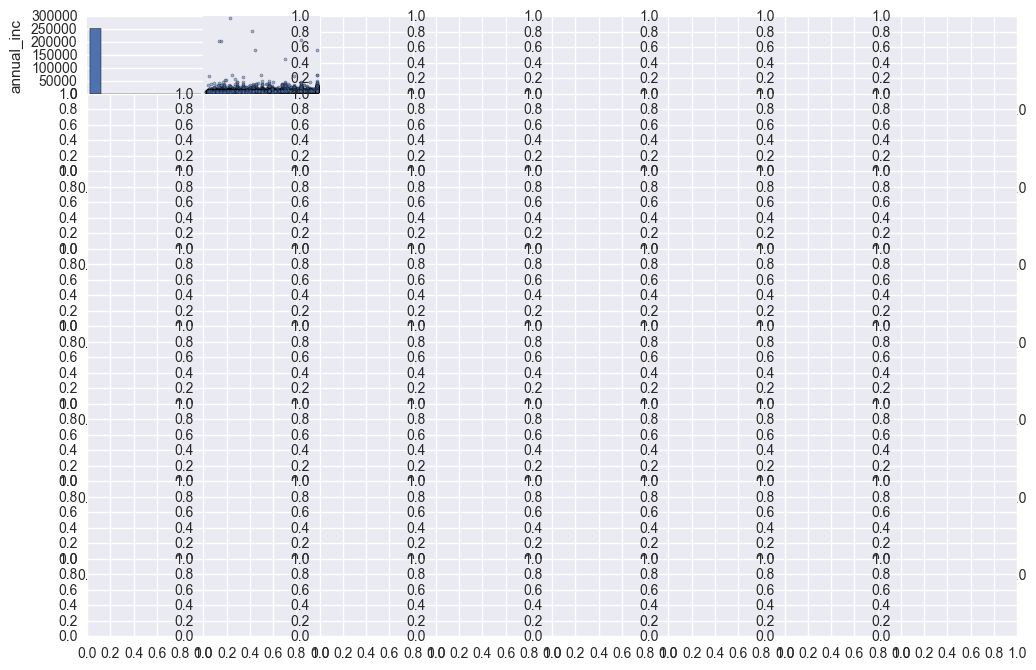

In [127]:
from pandas.tools.plotting import scatter_matrix

numerical_cols = df.select_dtypes(include=[np.number])
categoricals = df.select_dtypes(exclude=[np.number])

attributes = ['annual_inc', 'loan_amnt', 'revol_util', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_rec_int' ]
#              'recoveries','acc_now_delinq','delinq_2yrs','emp_length','int_rate','funded_amnt'

scatter_matrix(df[attributes], figsize=(12,8))

In [10]:
df[attributes].head()

,annual_inc,loan_amnt,revol_util,dti,open_acc,revol_bal,revol_util,total_rec_int
0,24000.0,5000.0,83.7,27.65,3.0,13648.0,83.7,861.07
1,30000.0,2500.0,9.4,1.00,3.0,1687.0,9.4,435.17
2,12252.0,2400.0,98.5,8.72,2.0,2956.0,98.5,603.65
3,49200.0,10000.0,21.0,20.00,10.0,5598.0,21.0,2209.33
4,80000.0,3000.0,53.9,17.94,15.0,27783.0,53.9,1009.07


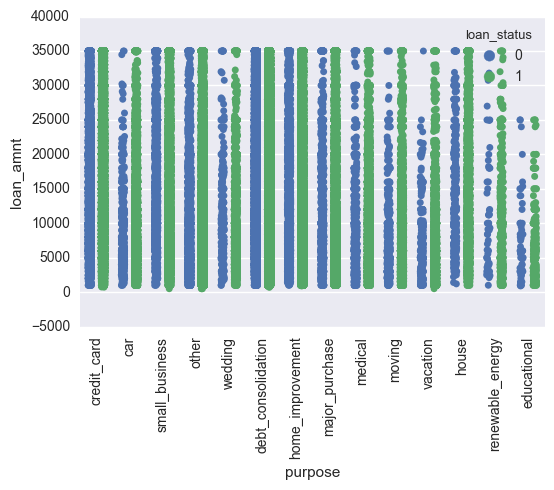

In [293]:
plt.xticks(rotation=90)
sns.stripplot(data=df[['loan_status','loan_amnt', 'purpose']], x='purpose', y='loan_amnt', \
              jitter=True, hue='loan_status', split=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

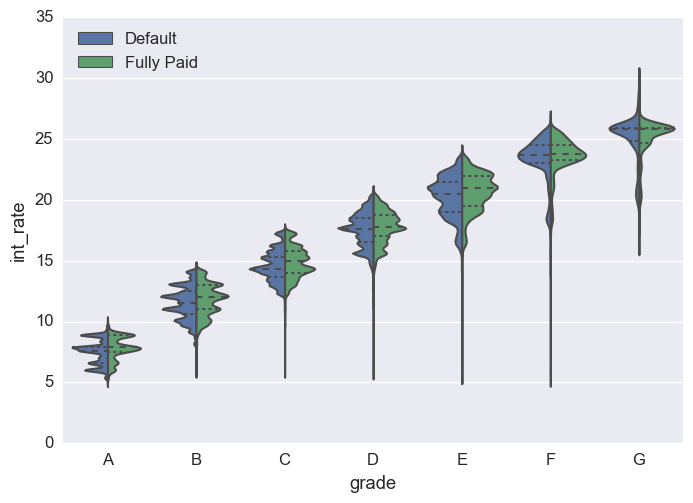

In [22]:
mapping_dict = {'loan_status':{1:'Fully Paid', 0:'Default'}}
df = df.replace(mapping_dict)

p2 = sns.violinplot(data=df[['loan_status', 'int_rate', 'grade']], hue='loan_status', x='grade', \
               order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], y='int_rate', split=True, inner='quartile', cut=4)

plt.legend(loc='upper left')
plt.xticks(rotation=0)

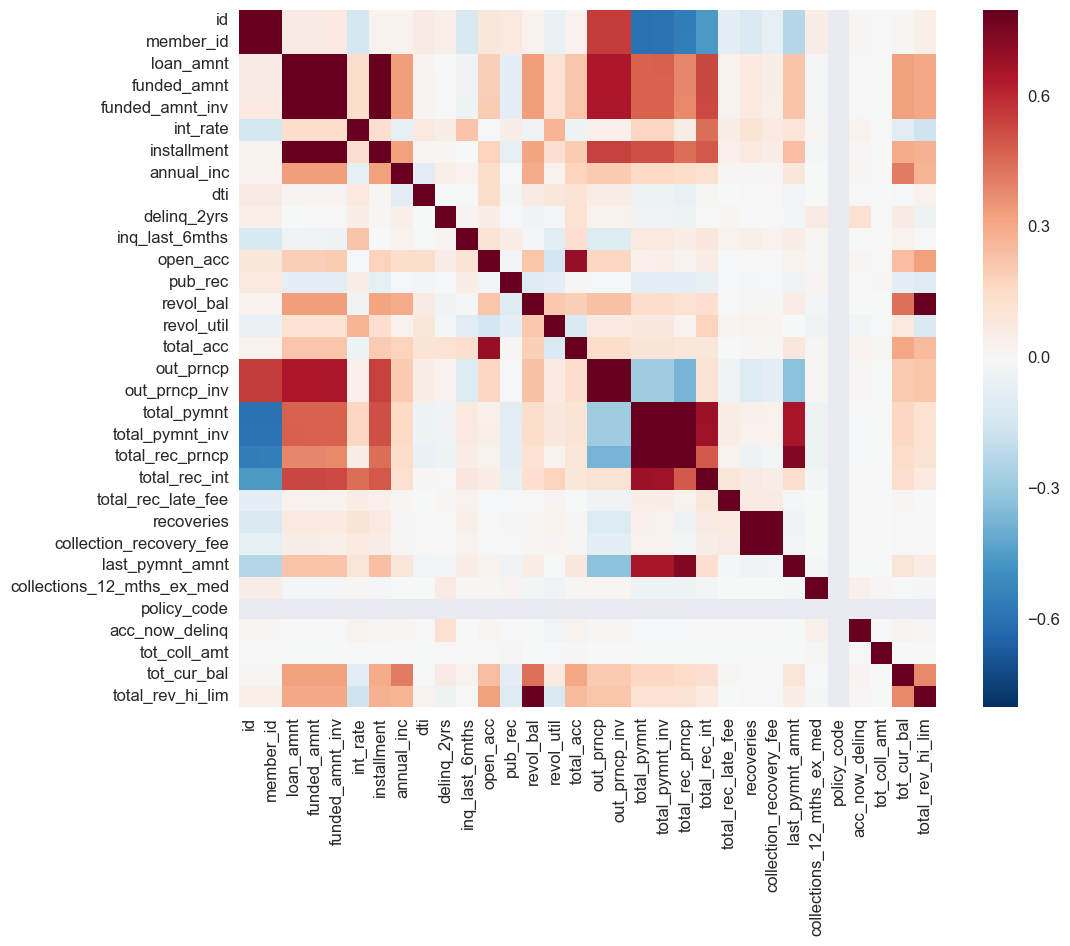

In [50]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

plt.subplots(figsize=(12, 9))
cor = df.corr()
# Draw the heatmap using seaborn
sns.heatmap(cor, vmax=.8, square=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

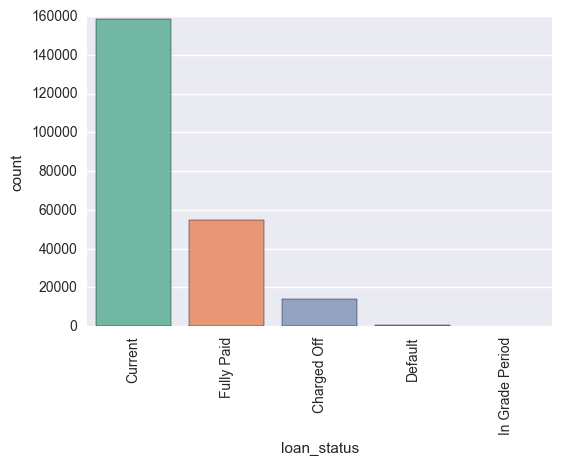

In [11]:
# Look at distribution per year
df['issue_month'], df['issue_year'] = zip(*df.issue_d.str.split('-'))

filtered_loans = df[df['issue_year'].isin(['2014'])]

sns.countplot(data=filtered_loans, x='loan_status', \
              order=['Current', 'Fully Paid','Charged Off', 'Default', 'In Grade Period'], palette='Set2')

plt.xticks(rotation=90)

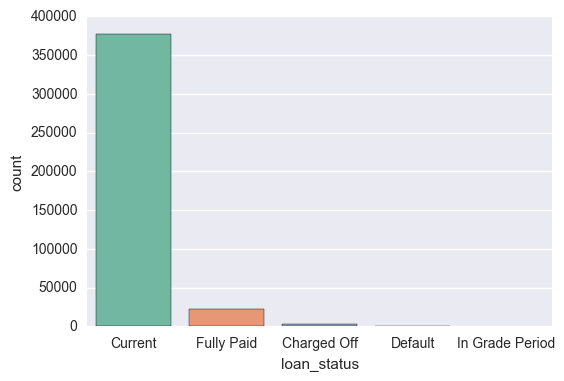

In [12]:
filtered_loans = df[df['issue_year'].isin(['2015'])]

sns.countplot(data=filtered_loans, x='loan_status', \
              order=['Current', 'Fully Paid','Charged Off', 'Default', 'In Grade Period'], palette='Set2')

# Data Preprocessing

** Cleaning abnomalies **

Converting data format and type for some features:

Employment Length

In [13]:
def print_data_shape(df):
    print ("No rows: {}".format(df.shape[0]))
    print ("No cols: {}".format(df.shape[1]))
    print (df.head(1).values)
    print ("Columns: " + df.columns)

In [14]:
def proc_emp_length():
    df.replace('n/a', np.nan, inplace=True)
    df.emp_length.fillna(value=0, inplace=True)
    df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
    df['emp_length'] = df['emp_length'].astype(int)
    #df.emp_length.head()

Revolving Utility

In [15]:
df.revol_bal.head()

0    13648.0
1     1687.0
2     2956.0
3     5598.0
4    27783.0
Name: revol_bal, dtype: float64

Emloyment Title

In [16]:
print (df.emp_title.value_counts().head())
print (df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: emp_title, dtype: int64
WHS Warehouse/PIV OP               1
PSM Librarian                      1
Heilind electronics                1
Account service representative     1
Sr. Acct. Clerk                    1
Name: emp_title, dtype: int64


(299273,)

Verified Income

In [17]:
df.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

Issue Date: Split into month and year field

In [18]:
def proc_issue_d():
    df['issue_month'], df['issue_year'] = zip(*df.issue_d.str.split('-'))
    df.drop(['issue_d'], 1, inplace=True)

Zip Code

In [19]:
def proc_zip_code():
    df['zip_code'] = df['zip_code'].str.rstrip('x')

Purpose

In [20]:
print (df.purpose.value_counts())
print ('')
print (df.title.value_counts().head())

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

Debt consolidation         414001
Credit card refinancing    164331
Home improvement            40112
Other                       31892
Debt Consolidation          15760
Name: title, dtype: int64


Create Binary Classifier

In [21]:
def proc_loan_status(df):
    #mapping_dict = {'loan_status':{'Fully Paid':0, 'Charged Off': 1, 'Default': 1, 'Current': 0}}
    mapping_dict = {'loan_status':{'Fully Paid':0, 'Charged Off': 1}}
    df = df.replace(mapping_dict)
    df = df[(df['loan_status'] == 1) | (df['loan_status'] == 0)]
    return df

Handle Missing values

Policy Code, Public Record, Payment Plan

In [22]:
df.policy_code.value_counts()
df.pub_rec.value_counts()
df.pymnt_plan.value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [23]:
def show_nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
    nulls.columns = ['Null Count']   
    nulls.index.name = 'Feature'
    return nulls

Show dataset

In [ ]:
df.ix[:5,:10]

In [ ]:
df.ix[:5,11:20]

In [ ]:
df.ix[:5,31:40]

In [ ]:
df.ix[:5,51:60]

Prepare Data: One hot encode, Scaling, normalise

In [140]:
def run_preproc(df):
    print ("processing emp_length")
    proc_emp_length()
    print ("processing description lenght")
    #proc_desc_len()
    print ("processing issue_d")
    proc_issue_d()
    print ("processing zip_code")
    proc_zip_code()

    print ("dropping cols")
    df.drop(['out_prncp','out_prncp_inv','total_pymnt',
             'total_pymnt_inv', 'total_rec_prncp'], 1 , inplace=True)
    df.drop(['last_pymnt_amnt'], 1, inplace=True)
    # drop columns highly correlated
    df.drop(['funded_amnt', 'funded_amnt_inv'], 1, inplace=True)
    # Drop surrogate identifiers
    df.drop(['id','member_id'], 1, inplace=True)
    # Dropping last few cols with too many nulls
    df.drop(['next_pymnt_d','total_rev_hi_lim','tot_coll_amt','tot_cur_bal','emp_title','last_pymnt_d', \
             'title','collections_12_mths_ex_med','last_credit_pull_d', 'total_acc', 'pub_rec', 'initial_list_status', \
             'policy_code','pymnt_plan','earliest_cr_line'], 1, inplace=True)
    # drop text columns
    df.drop(['url'], 1, inplace=True)
    # drop last few records with nulls
    df = df.dropna()

    print ("processing loan_status")
    df = proc_loan_status(df)
    print ("pre-processing complete")
    return df

df = maybe_load_loan_data(threshold=2, force='y')

df = run_preproc(df)
show_nulls(df)

processing emp_length
processing description lenght
processing issue_d
processing zip_code
dropping cols
processing loan_status
pre-processing complete


,Null Count
Feature,
issue_year,0
issue_month,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


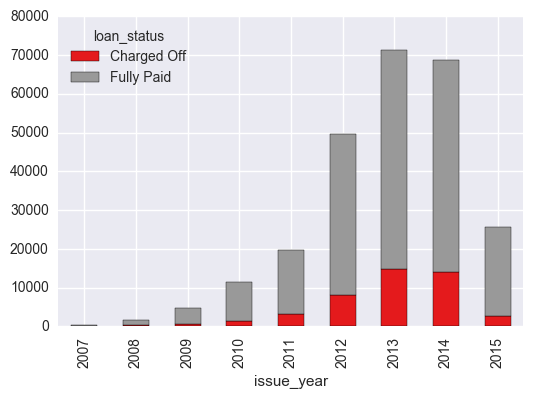

In [141]:
# data viz for
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grp = df.groupby(by=['issue_year','loan_status']).count()['loan_amnt'] #.plot(kind='bar', stacked=True)

# re-map loan status to categorical feature
mapping_dict = {'loan_status':{0:'Fully Paid', 1: 'Charged Off'}}
df2 = df.replace(mapping_dict)

# Visualise Loan Default Percentage / ratio per year
grp_df = df2.groupby(['issue_year','loan_status']).count().unstack()
#tempdf['percent']=tempdf[0]/tempdf['total']*100
grp_df['loan_amnt'].plot(kind='bar', stacked=True, colormap='Set1')

In [ ]:
df.groupby(['last_pymnt_amnt', 'loan_status']).count()['loan_amnt'].sort_values(ascending=False)

In [26]:
df.purpose.value_counts()

debt_consolidation    148286
credit_card            50062
home_improvement       14908
other                  14242
major_purchase          6248
small_business          4741
car                     3640
medical                 2843
moving                  2025
wedding                 1953
house                   1652
vacation                1583
educational              322
renewable_energy         267
Name: purpose, dtype: int64

For our analysis, we will use data for 2014 only

In [142]:
# Taking a sample of the dataset
filtered_loans = df[df['issue_year'].isin(['2014'])]

One hot encoding of categorical features

In [143]:
categoricals = filtered_loans.select_dtypes(exclude=[np.number])

categoricals.head()

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,application_type,issue_month,issue_year
230659,36 months,C,C3,RENT,Source Verified,0,debt_consolidation,077,NJ,INDIVIDUAL,Dec,2014
230662,36 months,C,C3,RENT,Source Verified,1,debt_consolidation,850,AZ,INDIVIDUAL,Dec,2014
230664,36 months,B,B4,RENT,Not Verified,0,debt_consolidation,208,MD,INDIVIDUAL,Dec,2014
230665,36 months,B,B5,MORTGAGE,Source Verified,0,home_improvement,554,MN,INDIVIDUAL,Dec,2014
230674,36 months,C,C5,RENT,Not Verified,0,credit_card,112,NY,INDIVIDUAL,Dec,2014


In [144]:
filtered_loans.drop(['zip_code'], inplace=True, axis=1)
filtered_loans.columns

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'application_type', 'acc_now_delinq',
       'issue_month', 'issue_year'],
      dtype='object')

In [145]:
# 'issue_year', 
cat_columns = ['home_ownership', 'verification_status', 'term', 'purpose', \
                   'grade', 'sub_grade', 'issue_month', 'issue_year', \
                   'application_type', 'addr_state'] 

def one_hot_encode(df, cat_cols):
    # addr_state
    dummy_df = pd.get_dummies(df[cat_cols])
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(cat_cols, axis=1)
    
    return df

filtered_loans = one_hot_encode(filtered_loans, cat_columns)
filtered_loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,acc_now_delinq,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,...,sub_grade_G4,sub_grade_G5,issue_month_Apr,issue_month_Aug,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep,issue_year_2014,application_type_INDIVIDUAL,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
230659,9600.000,13.660,326.530,10,69000.000,0,25.810,0.000,0.000,12.000,16388.000,59.400,373.430,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
230662,7650.000,13.660,260.200,1,50000.000,1,34.810,0.000,1.000,11.000,16822.000,91.900,339.610,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
230664,5250.000,11.440,172.980,2,26000.000,0,14.360,0.000,0.000,8.000,4448.000,20.200,181.680,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

In [146]:
# Show loan status distribution
filtered_loans['loan_status'].value_counts() / filtered_loans.shape[0]

0   0.797
1   0.203
Name: loan_status, dtype: float64

In [148]:
print_data_shape(filtered_loans)

No rows: 68644
No cols: 142
[[9600.0 13.66 326.53 10 69000.0 0 25.81 0.0 0.0 12.0 16388.0 59.4 373.43
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0]]
Index(['Columns: loan_amnt', 'Columns: int_rate', 'Columns: installment',
       'Columns: emp_length', 'Columns: annual_inc', 'Columns: loan_status',
       'Columns: dti', 'Columns: delinq_2yrs', 'Columns: inq_last_6mths',
       'Columns: open_acc',
       ...
       'Columns: addr_state_SD', 'Columns: addr_state_TN',
       'Columns: addr_state_TX', 'Columns

**Algorithms and Techniques**

In [149]:
def save_preproc_dataset(df, sub=None):
    #filtered_loans = df.sample(100000, random_state=42)
    df.to_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/filtered_loans.csv', index=False)

save_preproc_dataset(filtered_loans)

def open_preproc_dataset():
    df = pd.read_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/filtered_loans.csv')
    return df

In [150]:
from time import time

def compute_metrics(classifier, predictions):
    
    predictions = pd.Series(predictions)
    # False positives
    fp_filter = (predictions == 1) & (filtered_loans['loan_status'] == 0)
    fp = len(predictions[fp_filter])
    
    # True positives
    tp_filter = (predictions == 1) & (filtered_loans['loan_status'] == 1)
    tp = len(predictions[tp_filter])
    
    # False negatives
    fn_filter = (predictions == 0) & (filtered_loans['loan_status'] == 1)
    fn = len(predictions[fn_filter])
    
    # True negatives
    tn_filter = (predictions == 0)& (filtered_loans['loan_status'] == 0)
    tn = len(predictions[tn_filter])
    
    # Rates
    '''print("tp {}".format(tp))
    print("tn {}".format(tn))
    print("fn {}".format(fn))
    print("fp {}".format(fp))'''

    try:
        tpr = tp / (tp + fn)
    except ZeroDivisionError:
        tpr = 0
        
    try:
        fpr = fp / (fp + tn)
    except ZeroDivisionError:
        fpr = 0    
    
    #print(tpr * 100)
    #print(fpr * 100)
    #print()
    
    print('All Measurements:')
    
    try:
        sp = tn / (tn + fp)
    except ZeroDivisionError:
        sp = 0

    try:
        sty = tp / (tp + fn)
    except ZeroDivisionError:
        sty = 0

    try:
        prcn = tp / (tp + fp)
    except ZeroDivisionError:
        prcn = 0

    G_mean = np.sqrt(sp * sty)
    acc = (tn + tp) /  len(predictions) #X_train.shape[0]
    
    method_dict = { 'classifier': '{}'.format(classifier),
                    'specificity': '{:.2f}'.format(sp*100), 
                    'sensitivity': '{:.2f}'.format(sty*100), 
                    'G-mean': '{:.2f}'.format(G_mean*100),
                    'precision': '{:.2f}'.format(prcn*100), 
                    'accuracy': '{:.2f}'.format(acc*100),
                    'False Positive Rate': '{:.2f}'.format(fpr*100)
                 }
    return pd.DataFrame(method_dict, index=['values'])

In [151]:
filtered_loans = open_preproc_dataset()
filtered_loans.ix[:5,1:30]
filtered_loans.shape

(68644, 142)

In [153]:
numerical_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'emp_length', \
                  'delinq_2yrs', 'installment', 'revol_bal', 'revol_util', \
                  'total_rec_int', 'recoveries', 'acc_now_delinq', \
                  'total_rec_late_fee', 'collection_recovery_fee']
numericals = filtered_loans.select_dtypes(include=[np.number])
numericals.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       ...
       'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT',
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY'],
      dtype='object', length=142)

In [154]:
# split dataset: feature and target columns
x_cols = filtered_loans.columns
features_cols = x_cols.drop(['loan_status']) # Dropping target field
features_raw = filtered_loans[features_cols]
target_raw = filtered_loans['loan_status'].values

In [155]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.cross_validation import cross_val_predict, KFold
from sklearn.utils import shuffle

scaler = StandardScaler()

#features_raw.loc[:,(numerical_cols)]  = scaler.fit_transform(features_raw[numerical_cols])
features_raw.loc[:,(numerical_cols)] = normalize(features_raw[numerical_cols])

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [156]:
pd.options.display.max_columns = 127

display(features_raw.head(3))

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,acc_now_delinq,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,...,sub_grade_G4,sub_grade_G5,issue_month_Apr,issue_month_Aug,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep,issue_year_2014,application_type_INDIVIDUAL,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0.134,0.000,0.005,0.000,0.964,0.000,0.000,0.000,12.000,0.229,0.001,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.144,0.000,0.005,0.000,0.938,0.001,0.000,1.000,11.000,0.316,0.002,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.195,0.000,0.006,0.000,0.967,0.001,0.000,0.000,8.000,0.165,0.001,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.0

In [157]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    features_raw, target_raw, random_state=1, test_size=.25)

In [158]:
from collections import Counter
Counter(y_train)
#X_train.head()

Counter({0: 40973, 1: 10510})

Create a Generic Classifier Function

In [159]:
def run_classifier(clf, X, y, penalty=None, random=1):
    start_time = time()
    kf = KFold(X.shape[0], random_state=random, shuffle=False)

    predictions = cross_val_predict(clf, X, y, cv=kf) 

    # Let's compute performance:
    metrics = compute_metrics(clf.__class__.__name__, predictions)
    duration = int(round((time() - start_time) * 1000))
    return metrics, duration, predictions

#print ("Elapsed: {%H %M %S %Z}".format(elapsed))

In [160]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from scipy import interp
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import StratifiedKFold
else:
    from sklearn.model_selection import StratifiedKFold

In [161]:
#filtered_loans.iloc[:, 2:].values
X_train.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,acc_now_delinq,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,...,sub_grade_G4,sub_grade_G5,issue_month_Apr,issue_month_Aug,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep,issue_year_2014,application_type_INDIVIDUAL,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
6490,0.168,0.000,0.005,0.000,0.978,0.000,0.000,0.000,11.000,0.122,0.001,0.012,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
52350,0.124,0.000,0.004,0.000,0.990,0.000,0.000,2.000,6.000,0.068,0.002,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
53389,0.181,0.000,0.006,0.000,0.980,0.000,0.000,2.000,9.000,0.075,0.000,0.029,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

Plot ROC Curves

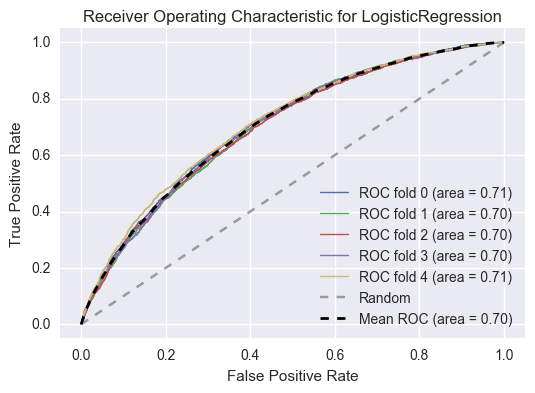

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,0.20,5.28,79.72,LogisticRegression,25.89,0.28,99.80


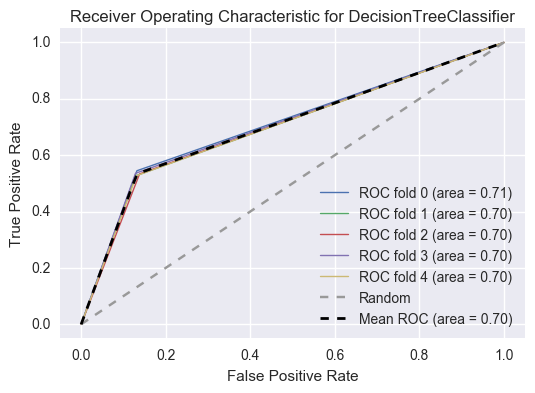

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,21.67,40.26,66.70,DecisionTreeClassifier,19.44,20.69,78.33


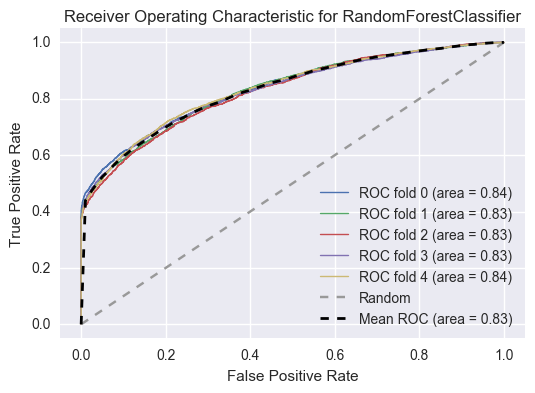

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,8.33,26.90,74.76,RandomForestClassifier,19.32,7.89,91.67


In [162]:
from IPython.display import display, HTML

def plot_ROC_curve(classifier, X, y, pos_label=1, n_folds=5):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    
    mean_tpr /= n_folds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(classifier.__class__.__name__))
    plt.legend(loc="lower right")
    plt.show()

LR = LogisticRegression(C=0.01)
DT = DecisionTreeClassifier(random_state=1)
RFC = RandomForestClassifier(n_estimators=100, bootstrap=True, min_samples_leaf=5, max_depth=20,max_features=10)

plot_ROC_curve(LR, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=LR, X=X_train, y=y_train.astype(int), random=1)
display(metrics)

plot_ROC_curve(DT, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=DT, X=X_train, y=y_train.astype(int), random=1)
display(metrics)

plot_ROC_curve(RFC, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=RFC, X=X_train, y=y_train.astype(int), random=1)
display(metrics)

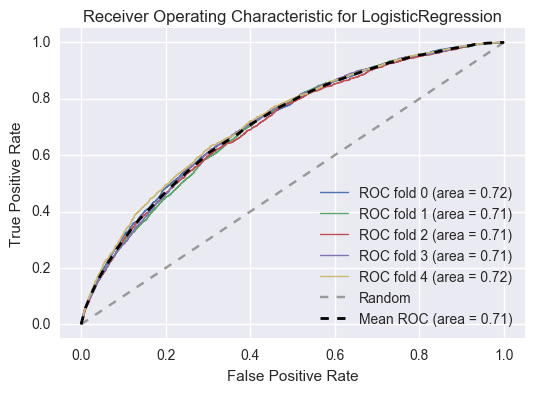

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,74.88,43.44,35.20,LogisticRegression,20.23,75.11,25.12


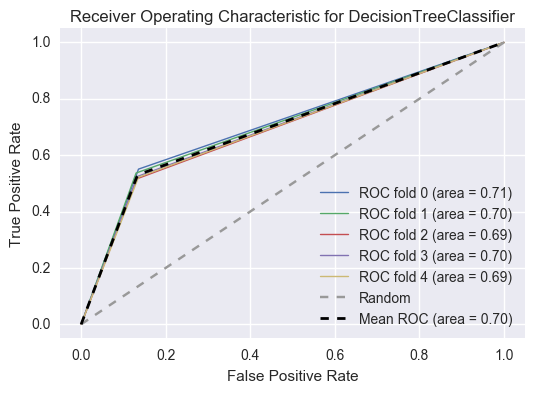

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,21.49,41.28,67.05,DecisionTreeClassifier,20.34,21.71,78.51


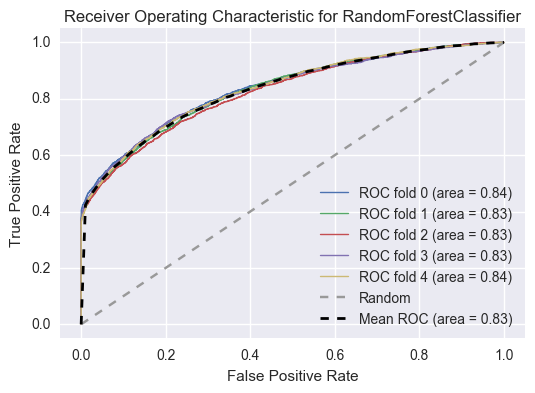

All Measurements:


,False Positive Rate,G-mean,accuracy,classifier,precision,sensitivity,specificity
values,33.10,46.85,60.02,RandomForestClassifier,20.03,32.81,66.90


In [163]:
penalty = {
    0: 1,
    1: 8
}

LR = LogisticRegression(C=0.01, class_weight=penalty)
DT = DecisionTreeClassifier(random_state=1, class_weight=penalty)
RFC = RandomForestClassifier(n_estimators=100, bootstrap=True, min_samples_leaf=5, max_depth=20, 
                             max_features=10, class_weight=penalty)

plot_ROC_curve(LR, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=LR, X=X_train, y=y_train.astype(int), random=1, penalty=penalty)
display(metrics)

plot_ROC_curve(DT, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=DT, X=X_train, y=y_train.astype(int), random=1, penalty=penalty)
display(metrics)

plot_ROC_curve(RFC, X_train.values, y_train.astype(int))
metrics, elapsed, preds = run_classifier(clf=RFC, X=X_train, y=y_train.astype(int), random=1, penalty=penalty)
display(metrics)

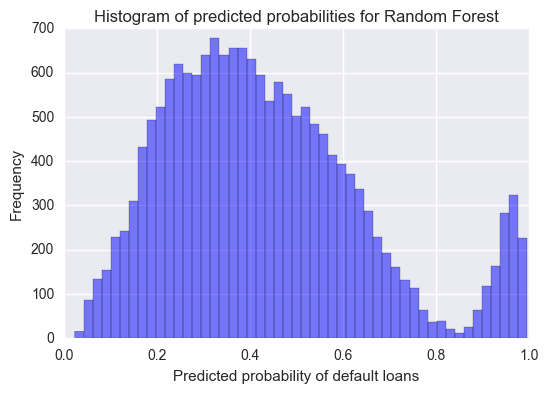

In [164]:
#plt.hist(y_train, bins=50, alpha=0.5, color='g')
plt.hist(RFC.predict_proba(X_test)[:, 1], bins=50, alpha=0.5, color='b')

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities for Random Forest')
plt.xlabel('Predicted probability of default loans')
plt.ylabel('Frequency')

Grid Search to find optimal parameters

In [83]:
len(y_train[y_train == 1])

10510

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV

penalty = {
    0: 1,
    1: 11
}

pipe = make_pipeline(LogisticRegression(class_weight=penalty))
C_range = 10.**np.arange(-2, 3)http://localhost:8888/notebooks/Projects/machine-learning/projects/capstone/Lending%20Club%20Capstone%20Project%20Notebook.ipynb#
penalty_options = ['l1','l2']
param_grid = {'logisticregression__C': C_range, 'logisticregression__penalty': penalty_options}
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')
grid.fit(features_raw, target_raw)
grid.best_score_
grid.best_params_   # Print best parameters for the logistic model

Precision Recall (PR) Curves

In [165]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def PR_Curve(clf, X, y):
    print ("Calculate Aera Under Precision/Recall Curve for {}:".format(clf.__class__.__name__))
    clf.fit(X_train, y_train)
    precision, recall, thresholds = precision_recall_curve(y.astype(int), clf.predict_proba(X)[:,1])
    area = auc(recall, precision)
    print ("Area Under PR Curve(AP): %0.2f" % area)  #should be same as AP?

    print ('AP', average_precision_score(y_test, clf.predict_proba(X)[:,1], average='weighted'))
    print ('AP', average_precision_score(y_test, clf.predict_proba(X)[:,1], average='macro'))
    print ('AP', average_precision_score(y_test, clf.predict_proba(X)[:,1], average='micro'))
    print ('AP', average_precision_score(y_test, clf.predict_proba(X)[:,1], average='samples'))
    print ("")
    
PR_Curve(LR, X_test, y_test)
PR_Curve(DT, X_test, y_test)
PR_Curve(RFC, X_test, y_test)

Calculate Aera Under Precision/Recall Curve for LogisticRegression:
Area Under PR Curve(AP): 0.40
AP 0.399186408921
AP 0.399186408921
AP 0.399186408921
AP 0.399186408921

Calculate Aera Under Precision/Recall Curve for DecisionTreeClassifier:
Area Under PR Curve(AP): 0.56
AP 0.561138911747
AP 0.561138911747
AP 0.561138911747
AP 0.561138911747

Calculate Aera Under Precision/Recall Curve for RandomForestClassifier:
Area Under PR Curve(AP): 0.69
AP 0.694672228851
AP 0.694672228851
AP 0.694672228851
AP 0.694672228851



Feature Importance

(0.0, 0.25)

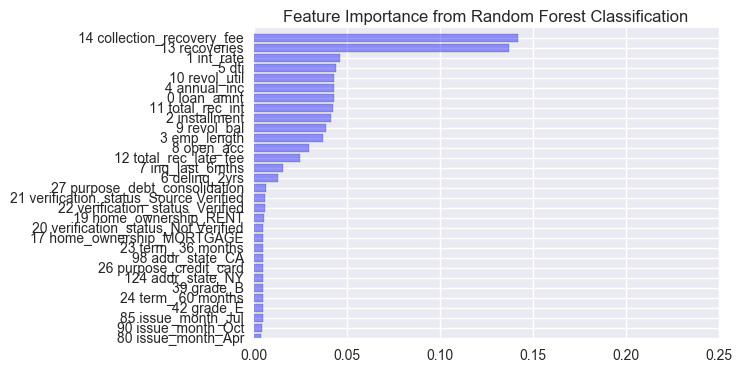

In [167]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

RF = RandomForestClassifier(n_estimators=100, random_state=1).fit(features_raw, target_raw)

feature_names = np.array([' '.join([str(b), a]) for a,b in zip(features_raw.columns, range(len(features_raw.columns)))])

importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Feature Importance from Random Forest Classification")

plt.barh(range_, importance[indices], color="b", xerr=None, alpha=0.4, align="center") # xerr=std[indices]

plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([110, len(importance)])
#plt.ylim([100, 135])
plt.xlim([0.0, 0.25])

*Refinement*

Trying to balance the dataset to improve performance: Undersampling

In [125]:
from collections import Counter
from imblearn.under_sampling import NearMiss 

nm = NearMiss(random_state=1)
X_res, y_res = nm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 10510, 1: 10510})


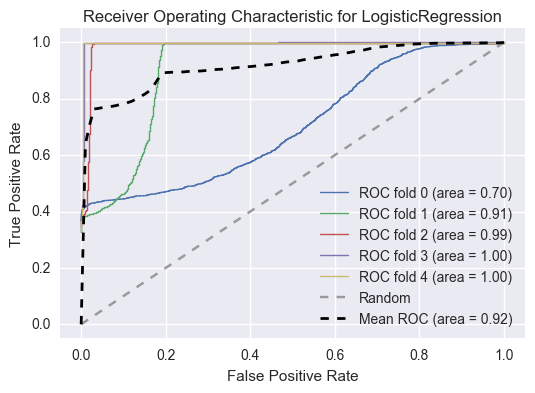

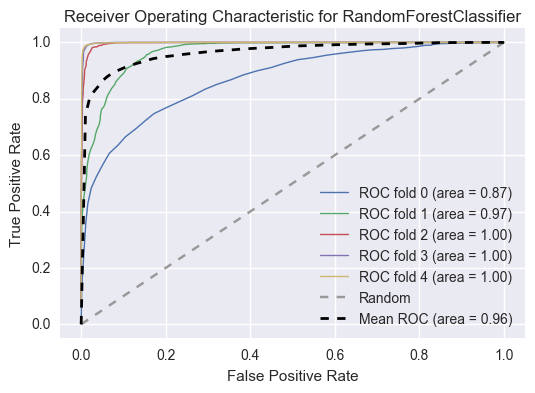

49.77733795150915
51.3546943102839
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,51.35,49.21,80.27,48.86,LogisticRegression,18.75,49.78,48.65


56.08609599208313
57.786547296501354
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,57.79,48.66,80.15,44.88,RandomForestClassifier,18.77,56.09,42.21


In [127]:
LR = LogisticRegression(C=0.01)
RFC = RandomForestClassifier(n_estimators=100, bootstrap=True)

plot_ROC_curve(LR, X_res, y_res)
plot_ROC_curve(RFC, X_res, y_res)

metrics, elapsed = run_classifier(clf=LR, X=X_res, y=y_res.astype(int), random=1)
display(metrics)

metrics, elapsed = run_classifier(clf=RFC, X=X_res, y=y_res.astype(int), random=1)
display(metrics)

Trying to balance the dataset to improve performance: Oversampling with SMOTE

Testing SMOTE algorithm

In [85]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 40973, 1: 40973})


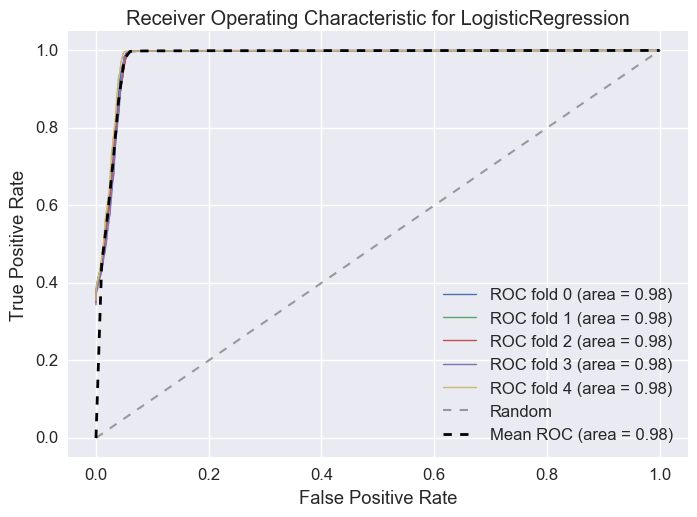

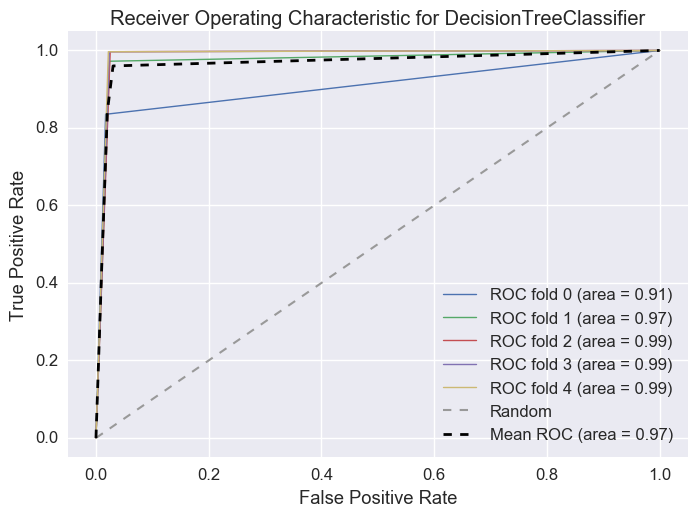

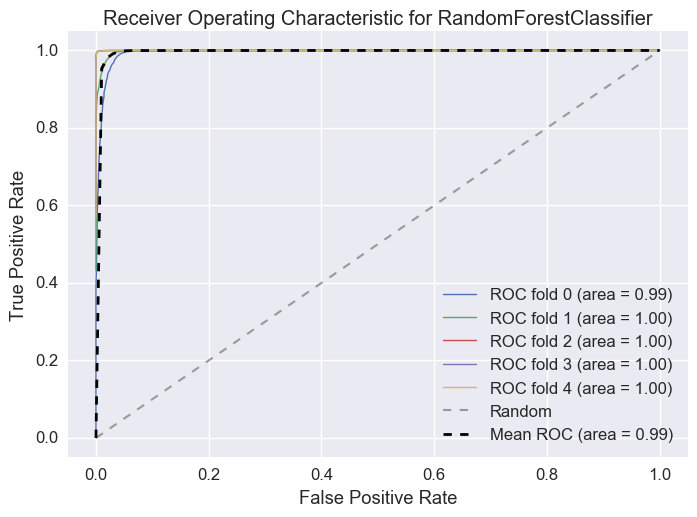

44.325098460436806
44.14857623584923
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,44.15,49.76,79.71,44.82,LogisticRegression,20.41,44.33,55.85


40.59434300035804
40.249455915433714
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,40.25,49.25,79.75,46.79,DecisionTreeClassifier,20.48,40.59,59.75


41.68993913354815
41.54428574041222
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,41.54,49.37,79.70,46.11,RandomForestClassifier,20.40,41.69,58.46


In [86]:
LR = LogisticRegression(C=0.01)
DT = DecisionTreeClassifier(random_state=1)
RFC = RandomForestClassifier(n_estimators=100, bootstrap=True)

plot_ROC_curve(LR, X_res, y_res)
plot_ROC_curve(DT, X_res, y_res)
plot_ROC_curve(RFC, X_res, y_res)

metrics, elapsed = run_classifier(clf=LR, X=X_res, y=y_res.astype(int), random=1)
display(metrics)

metrics, elapsed = run_classifier(clf=DT, X=X_res, y=y_res.astype(int), random=1)
display(metrics)

metrics, elapsed = run_classifier(clf=RFC, X=X_res, y=y_res.astype(int), random=1)
display(metrics)

Resampled dataset shape Counter({0: 10510, 1: 10510})


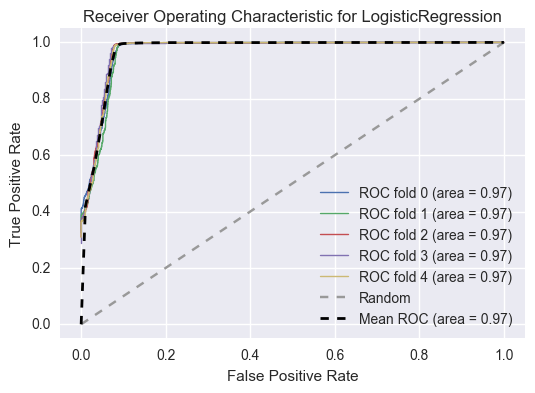

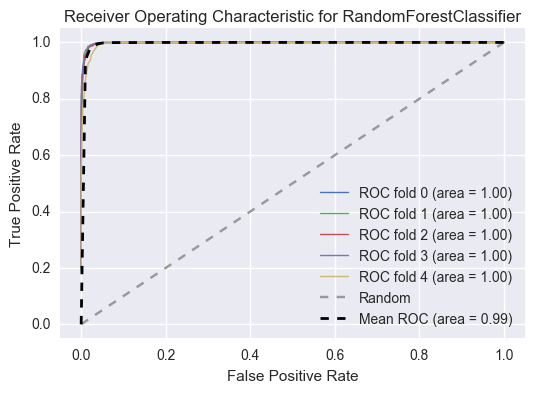

In [132]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_res, y_res = cc.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

LR = LogisticRegression(C=0.01)
RFC = RandomForestClassifier(n_estimators=100, bootstrap=True)

plot_ROC_curve(LR, X_res, y_res)
plot_ROC_curve(RFC, X_res, y_res)